<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/transfer_MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Transfer com mobilenet V2

In [1]:
!pip install tensorflow-gpu==2.0.0 

     |████████████████████████████████| 380.8MB 43kB/s 
     |████████████████████████████████| 450kB 51.5MB/s 
     |████████████████████████████████| 3.8MB 47.8MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.__version__

'2.0.0'

In [3]:
base_model = tf.keras.applications.MobileNetV2(weights='imagenet')

14540800/14536120 [==============================] - 2s 0us/step


In [4]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [10]:
#Testando o modelo original
from keras.preprocessing import image
img_path = 'sax.jfif'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x=tf.keras.applications.mobilenet_v2.preprocess_input(x)
preds = base_model.predict(x)
tf.keras.applications.mobilenet_v2.decode_predictions(preds)



[[('n04141076', 'sax', 0.963527),
  ('n02804610', 'bassoon', 0.004659021),
  ('n03110669', 'cornet', 0.0011507672),
  ('n03838899', 'oboe', 0.0007239289),
  ('n02999410', 'chain', 0.00052578497)]]

In [0]:
#criação da nova rede (modelox), com base na original
out=base_model.layers[-2].output #pego a penúltima camada de outup da Rede Original
x=tf.keras.layers.Dense(10, activation='relu')(out)#incluo uma camada densa com 10
#preceptrons a ativação relu
x=tf.keras.layers.Dense(2, activation='softmax')(x)#softmax no output ()
modelox=tf.keras.Model(inputs=base_model.input,outputs=x)#criação do modelo
#no processo "funcional"
for layer in modelox.layers[:-2]:#congelando as camadas prontas
  layer.trainable=False


In [12]:
modelox.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [0]:
modelox.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
import os

def list_files(path,ini):
    l=[]
    for name in os.listdir(path):
        if name[0]==ini:l.append(name)#ignorar outros arquivos
    return l
lo1=list_files('/content/o1','o')
lx1=list_files('/content/x1','x')

In [16]:
lx1

['x4.png',
 'x10.png',
 'x5.png',
 'x6.png',
 'x1.png',
 'x8.png',
 'x7.png',
 'x9.png',
 'x2.png',
 'x3.png']

In [18]:
!cd /content/o1 && ls -la

total 48
drwxr-xr-x 2 root root 4096 Mar  3 23:27 .
drwxr-xr-x 1 root root 4096 Mar  3 23:27 ..
-rw-r--r-- 1 root root 1204 Mar  3 23:27 o10.png
-rw-r--r-- 1 root root 1662 Mar  3 23:27 o1.png
-rw-r--r-- 1 root root 1499 Mar  3 23:27 o2.png
-rw-r--r-- 1 root root 1389 Mar  3 23:27 o3.png
-rw-r--r-- 1 root root 1243 Mar  3 23:27 o4.png
-rw-r--r-- 1 root root 1630 Mar  3 23:27 o5.png
-rw-r--r-- 1 root root 1403 Mar  3 23:27 o6.png
-rw-r--r-- 1 root root 1738 Mar  3 23:27 o7.png
-rw-r--r-- 1 root root 1052 Mar  3 23:27 o8.png
-rw-r--r-- 1 root root 1651 Mar  3 23:27 o9.png


In [0]:
Xtn=[]
ytn=[]
patho='/content/o1/'
for arq in lo1:
  img=plt.imread(patho+arq)
  Xtn.append(img)
  ytn.append([0])
pathx='/content/x1/'
for arq in lx1:
  img=plt.imread(pathx+arq)
  Xtn.append(img)
  ytn.append([1])
             
Xtn=np.array(Xtn)
ytn=np.array(ytn)


In [0]:
from keras.utils import to_categorical
#one-hot encode target column
ytn_enc = to_categorical(ytn)


In [22]:
hist1=modelox.fit(Xtn, ytn_enc, epochs=500)

Train on 20 samples
Epoch 1/500
20/20 [==============================] - 3s 144ms/sample - loss: 0.9056 - accuracy: 0.5000
Epoch 2/500
20/20 [==============================] - 0s 2ms/sample - loss: 0.3556 - accuracy: 0.9500
Epoch 3/500
20/20 [==============================] - 0s 2ms/sample - loss: 0.2813 - accuracy: 0.9500
Epoch 4/500
20/20 [==============================] - 0s 2ms/sample - loss: 0.2298 - accuracy: 0.9500
Epoch 5/500
20/20 [==============================] - 0s 2ms/sample - loss: 0.1929 - accuracy: 1.0000
Epoch 6/500
20/20 [==============================] - 0s 2ms/sample - loss: 0.1651 - accuracy: 1.0000
Epoch 7/500
20/20 [==============================] - 0s 2ms/sample - loss: 0.1434 - accuracy: 1.0000
Epoch 8/500
20/20 [==============================] - 0s 2ms/sample - loss: 0.1266 - accuracy: 1.0000
Epoch 9/500
20/20 [==============================] - 0s 2ms/sample - loss: 0.1127 - accuracy: 1.0000
Epoch 10/500
20/20 [==============================] - 0s 2ms/sample -

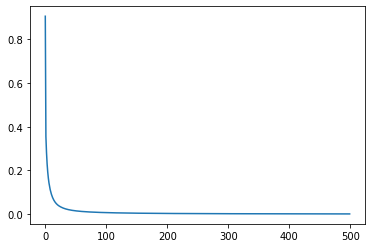

In [23]:
plt.plot(hist1.history['loss'])
plt.show()

In [25]:
from keras.preprocessing import image
img_path = './oxteste/xt1.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x=tf.keras.applications.mobilenet_v2.preprocess_input(x)
preds = modelox.predict(x)
preds


array([[0.35529327, 0.6447067 ]], dtype=float32)

Proponha uma validação melhor...

In [30]:
certos = 0
lot = list_files('./oxteste/', 'o')
for arq in lot:
  img = image.load_img('./oxteste/'+arq, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  # x=tf.keras.applications.mobilenet_v2.preprocess_input(x)
  preds = modelox.predict(x)
  print(preds, arq)
  if preds[0][0] > preds[0][1]: certos += 1

lxt = list_files('./oxteste/', 'x')
for arq in lxt:
  img = image.load_img('./oxteste/'+arq, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  # x=tf.keras.applications.mobilenet_v2.preprocess_input(x)
  preds = modelox.predict(x)
  print(preds, arq)
  if preds[0][1] > preds[0][0]: certos += 1

certos

[[0.9141028  0.08589717]] ot.png
[[0.83427155 0.16572845]] ot2.png
[[0.914715 0.085285]] ot1.png
[[0.86233944 0.13766055]] ot4.png
[[0.95694876 0.04305129]] ot3.png
[[0.57214135 0.42785862]] xt3.png
[[0.12381556 0.8761844 ]] xt5.png
[[0.08646676 0.9135333 ]] xt1.png
[[0.23096848 0.7690315 ]] xt2.png
[[0.43097168 0.5690284 ]] xt4.png
[[0.06424061 0.9357594 ]] xt.png


10